In [ ]:
!kaggle datasets download -d fedesoriano/cirrhosis-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/cirrhosis-prediction-dataset
License(s): copyright-authors
  0% 0.00/11.0k [00:00<?, ?B/s]
100% 11.0k/11.0k [00:00<00:00, 6.74MB/s]


# Importing Libraries and Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
#Unzip zip file
zip_file_path = '/content/cirrhosis-prediction-dataset.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
  zip_ref.extractall('/content/')

In [ ]:
#Insert CSV file into DataFrame
df = pd.read_csv('/content/cirrhosis.csv')
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


# Observing Dataset Characteristics

In [ ]:
#Observing shape of dataframe
print("Shape of DataFrame:", df.shape)

Shape of DataFrame: (418, 20)


In [ ]:
print("First 5 rows of the DataFrame:")
df.head()

First 5 rows of the DataFrame:


,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [ ]:
print("Last 5 rows of the DataFrame:")
df.tail()

Last 5 rows of the DataFrame:


,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0
417,418,976,C,NaN,19358,F,NaN,NaN,NaN,N,0.7,NaN,3.29,NaN,NaN,NaN,NaN,350.0,10.6,4.0


In [ ]:
# Investigate the data types of each column and whether they contain null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [ ]:
#View descriptive statistics of the dataset
df.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


# Data Preprocessing (Part 1)

## **Dropping Columns**

In [ ]:
#Drop ID column since it is same with index
df.drop(columns=['ID'], inplace=True)

## **Check for Duplicate Values**

In [ ]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


## **Filling Missing Values**

In [ ]:
# Obtain the number of missing values in each column
missing_values = df.isnull().sum()

# Display columns with missing values
print("\nMissing values in each column:")
print(missing_values[missing_values > 0])


Missing values in each column:
Drug             106
Ascites          106
Hepatomegaly     106
Spiders          106
Cholesterol      134
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64


In [ ]:
#Replace null numerical values with median values
numerical_columns = df.select_dtypes(include = ['int64', 'float64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

#Replace null categorical values with mode values
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    if not df[column].mode().empty:  # Ensure there is a mode value
        df[column].fillna(df[column].mode()[0], inplace=True)

#Verify that null values are filled
df.isnull().sum()

<ipython-input-16-13d1e0f23a22>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


,0
N_Days,0
Status,0
Drug,0
Age,0
Sex,0
Ascites,0
Hepatomegaly,0
Spiders,0
Edema,0
Bilirubin,0


## **Converting Values**

In [ ]:
df['Age'] = (df['Age'] // 365).astype(int)
df['Stage'] = df['Stage'].astype(int)

## **Removing Outliers**

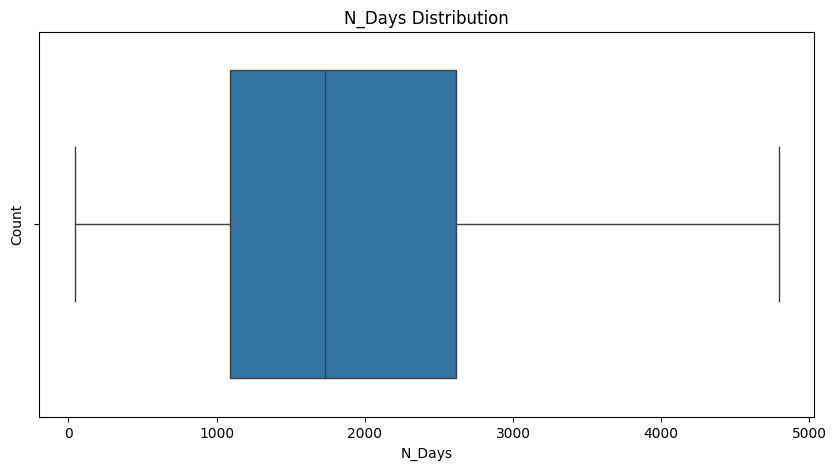

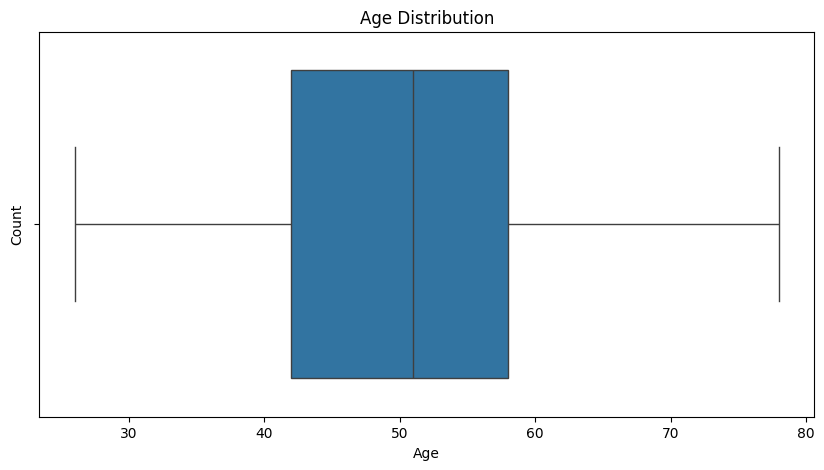

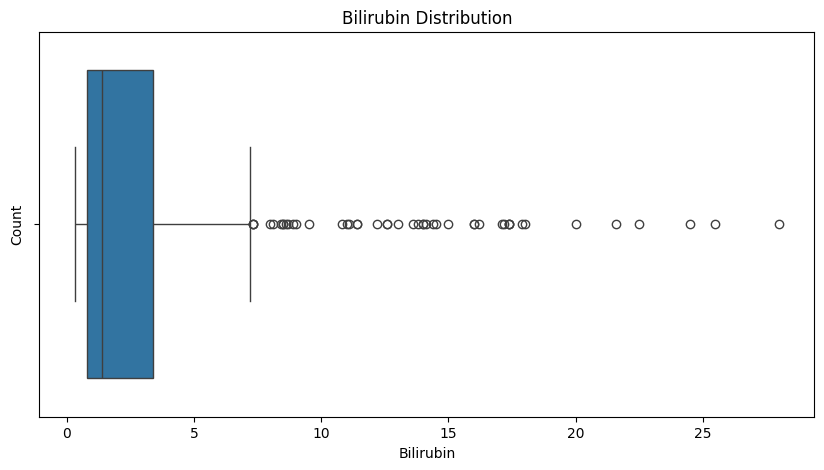

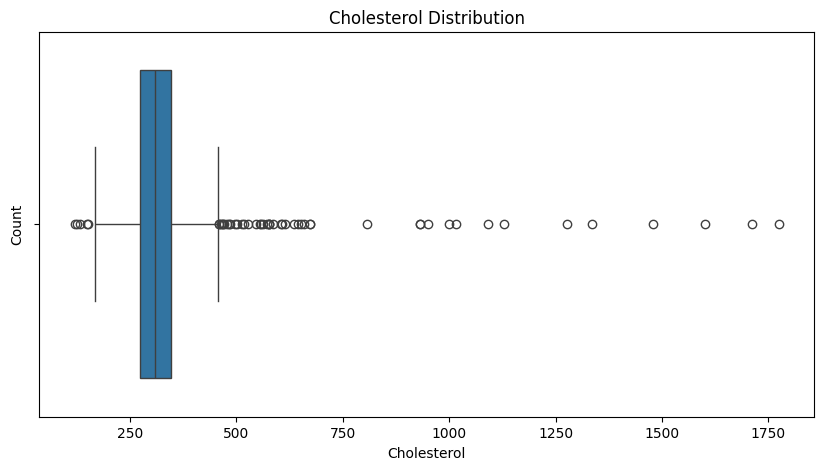

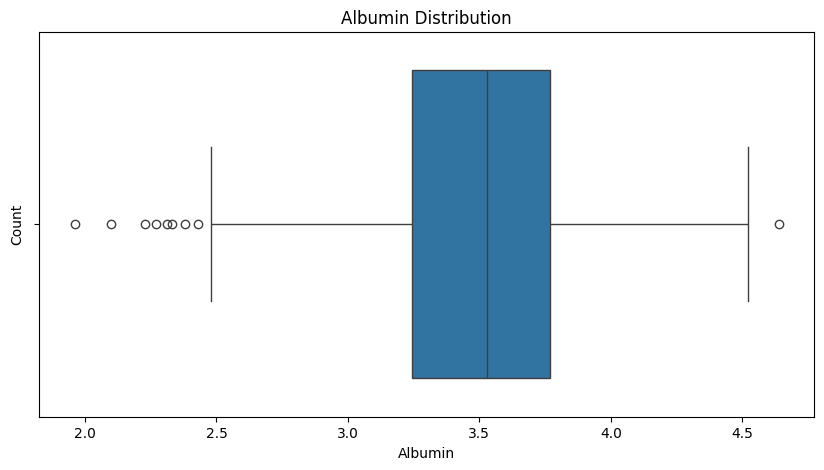

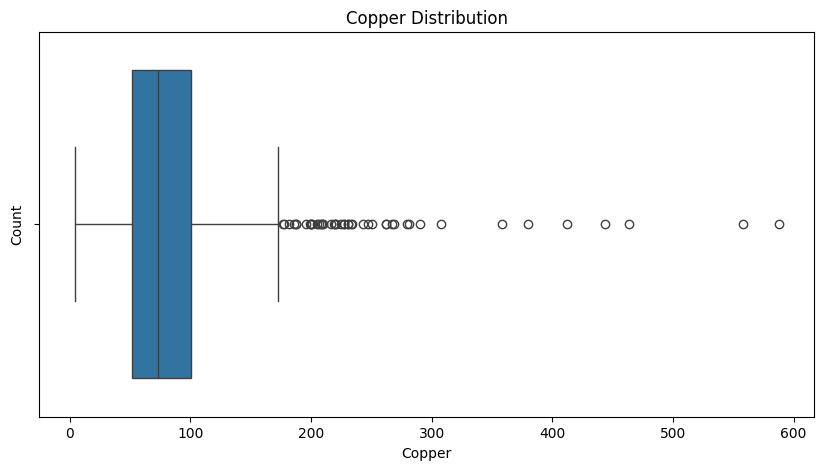

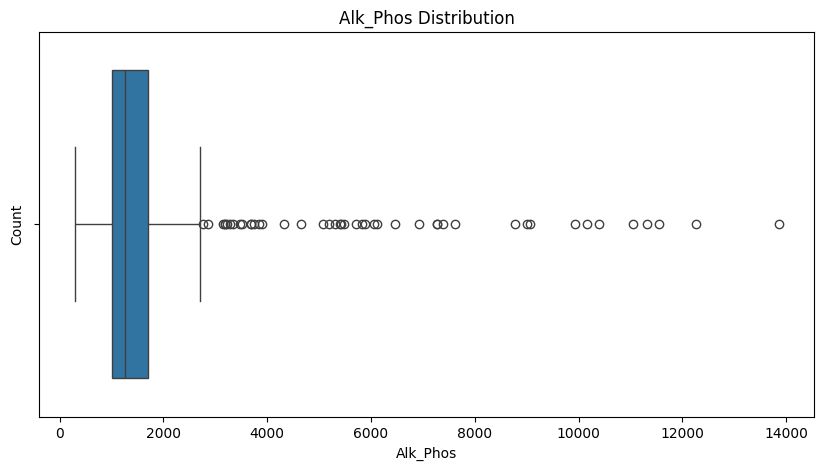

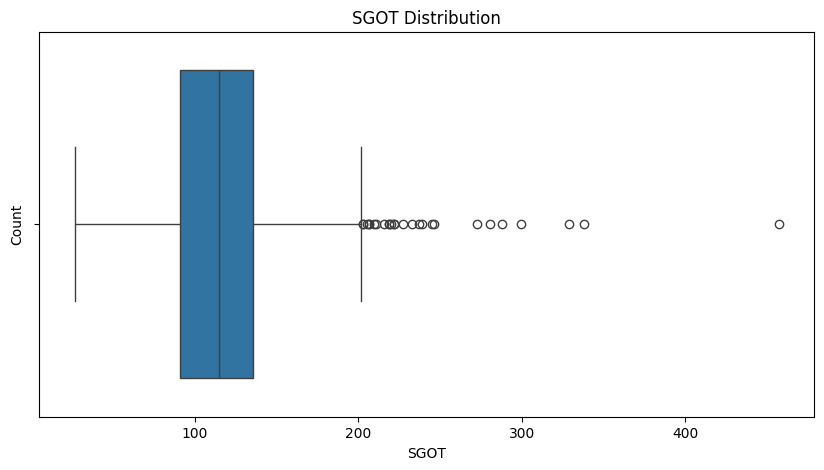

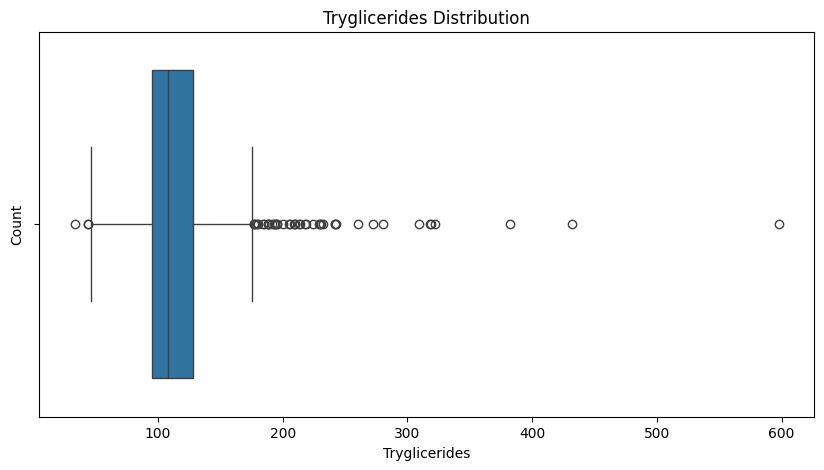

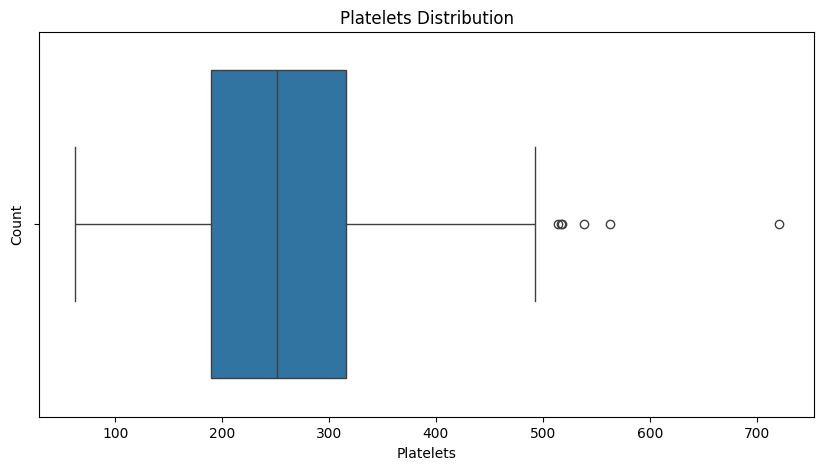

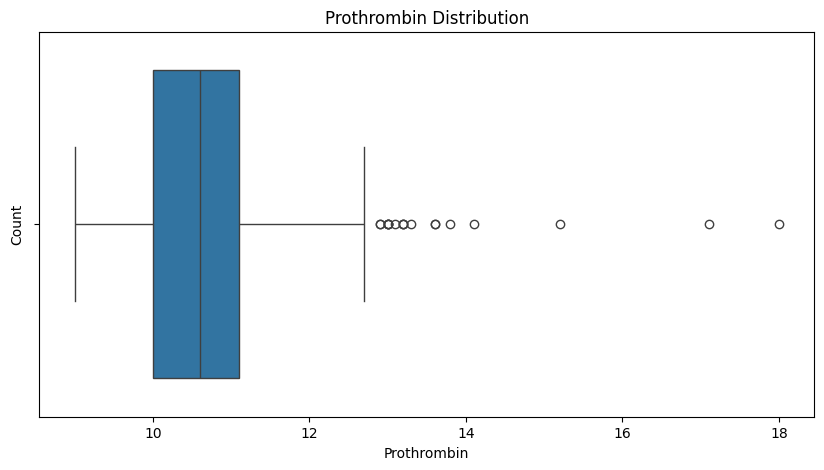

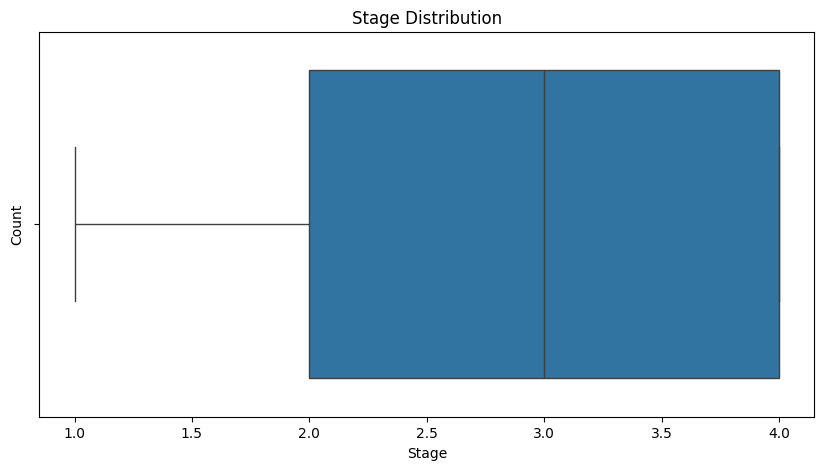

In [ ]:
#Plot boxplot to investigate the presence of outliers in numerical columns
numerical_columns = df.select_dtypes(include = ['int64', 'float64']).columns
for column in numerical_columns:
  plt.figure(figsize = (10,5))
  sns.boxplot(x = df[column])
  plt.xlabel(column)
  plt.ylabel('Count')
  plt.title(f'{column} Distribution')
  plt.show()

In [ ]:
#Obtaining the interquartile range of features containing outliers
outlier_columns = ['Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']


#Create a dataframe consisting of outliers
outlier_df = df[outlier_columns]

Q1 = outlier_df.quantile(0.25)
Q3 = outlier_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Bilirubin          2.6000
Cholesterol       74.7500
Albumin            0.5275
Copper            49.5000
Alk_Phos         691.5000
SGOT              44.7500
Tryglicerides     32.7500
Platelets        125.5000
Prothrombin        1.1000
dtype: float64


In [ ]:
#Setting threshold to remove extreme outliers
threshold = 3
outliers = outlier_df[(outlier_df < Q1 - threshold * IQR) | (outlier_df > Q3 + threshold * IQR)]

In [ ]:
#Replace outliers with median values
for column in outlier_columns:
  median = df[column].median()
  std = df[column].std()

  outliers = (df[column] - median).abs() > std
  df.loc[outliers, column] = np.nan

  df[column] = df[column].fillna(median)

## Correlation Between Features and Target

####Stage and Status


<ipython-input-22-3084321919e8>:2: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  ax = sns.countplot(data = df, x = 'Status', hue = 'Stage', palette = color, order=['D', 'C', 'CL'])


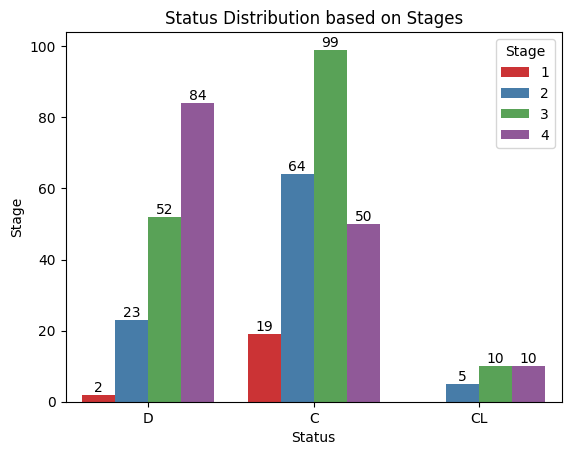

In [ ]:
color = sns.color_palette("Set1")
ax = sns.countplot(data = df, x = 'Status', hue = 'Stage', palette = color, order=['D', 'C', 'CL'])
plt.xlabel('Status')
plt.ylabel('Stage')
plt.title('Status Distribution based on Stages')

for container in ax.containers:
    ax.bar_label(container)

plt.show()

####Bilirubin and Status

<ipython-input-24-48cec5fd9a1e>:1: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.histplot(data = df, x = 'Bilirubin', hue = 'Status', bins = 10, multiple = 'stack', palette = color)


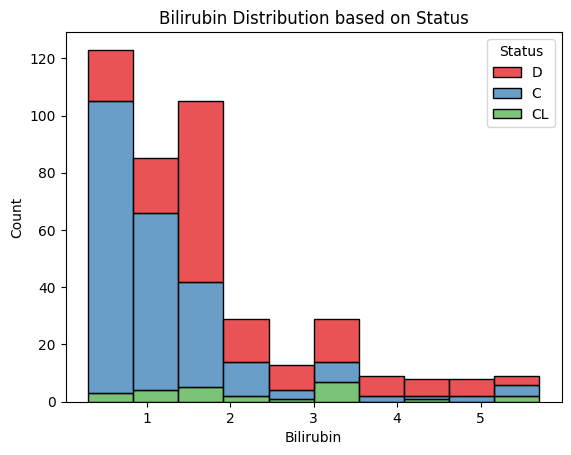

In [ ]:
sns.histplot(data = df, x = 'Bilirubin', hue = 'Status', bins = 10, multiple = 'stack', palette = color)
plt.xlabel('Bilirubin')
plt.ylabel('Count')
plt.title('Bilirubin Distribution based on Status')
plt.show()

####Prothrombin and Status

<ipython-input-28-65591af08d1e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status', y='Prothrombin', data=df, palette = color, order = ['D', 'C', 'CL'])
<ipython-input-28-65591af08d1e>:1: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.boxplot(x='Status', y='Prothrombin', data=df, palette = color, order = ['D', 'C', 'CL'])


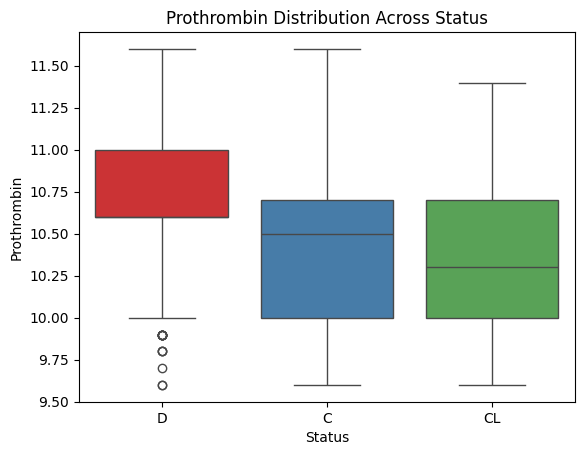

In [ ]:
sns.boxplot(x='Status', y='Prothrombin', data=df, palette = color, order = ['D', 'C', 'CL'])
plt.title('Prothrombin Distribution Across Status')
plt.show()

## Correlation Between Features


####Alk_Phos and SGOT

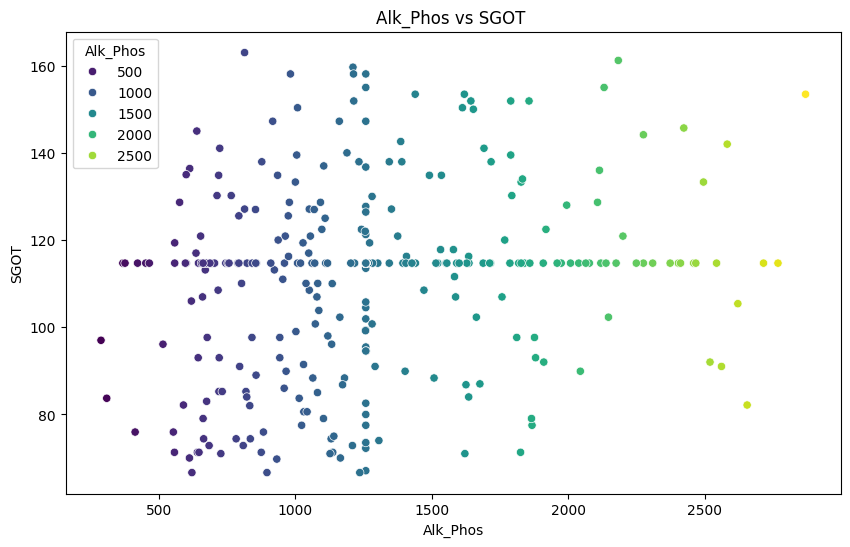

In [ ]:
feature_x = 'Alk_Phos'
feature_y = 'SGOT'

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df[feature_x], y=df[feature_y], hue=df[feature_x], palette='viridis')
plt.title(f'{feature_x} vs {feature_y} ')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend(title=feature_x)
plt.show()

####Edema and Ascites

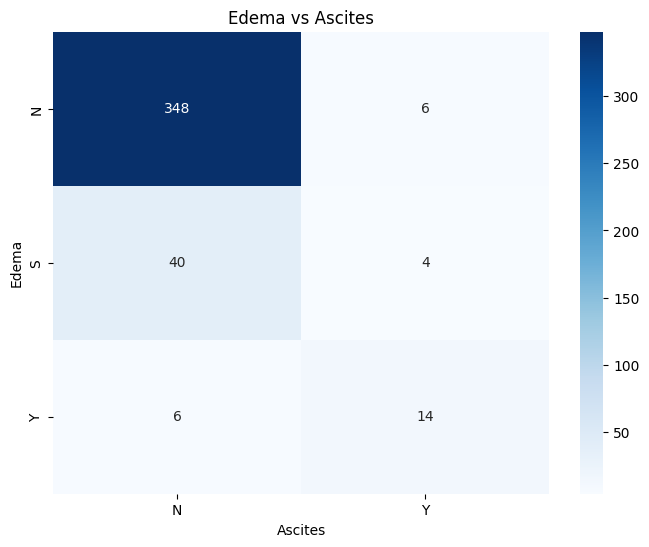

In [ ]:
# Create a cross-tabulation of Edema and Ascites
ct = pd.crosstab(df['Edema'], df['Ascites'])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(ct, annot=True, cmap='Blues', fmt='d')
plt.title('Edema vs Ascites')
plt.xlabel('Ascites')
plt.ylabel('Edema')
plt.show()

# Data Preprocessing (Part 2)

## Label Encoding, One-Hot Encoding and Standardization of Data

In [ ]:
#Initialize LabelEncoder
label_encoder = LabelEncoder()

#Apply LabelEncoder to columns to convert categorical values to numeric values
categorical_columns = df[['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders']].columns

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

#Status column has to be separated so that we can obtain the original values later
df['Status'] = label_encoder.fit_transform(df['Status'])
df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,2,0,58,0,1,1,1,Y,1.4,261.0,3.53,73.0,1718.0,137.95,108.0,190.0,10.6,4
1,4500,0,0,56,0,0,1,1,N,1.1,302.0,3.53,54.0,1259.0,113.52,88.0,221.0,10.6,3
2,1012,2,0,70,1,0,0,0,S,1.4,176.0,3.48,73.0,516.0,96.10,55.0,251.0,10.6,4
3,1925,2,0,54,0,0,1,1,S,1.8,244.0,3.53,64.0,1259.0,114.70,92.0,183.0,10.3,4
4,1504,1,1,38,0,0,1,1,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,251.0,10.9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,681,2,0,67,0,0,1,0,N,1.2,309.5,3.53,73.0,1259.0,114.70,108.0,174.0,10.9,3
414,1103,0,0,39,0,0,1,0,N,0.9,309.5,3.83,73.0,1259.0,114.70,108.0,180.0,11.2,4
415,1055,0,0,57,0,0,1,0,N,1.6,309.5,3.42,73.0,1259.0,114.70,108.0,251.0,9.9,3
416,691,0,0,58,0,0,1,0,N,0.8,309.5,3.75,73.0,1259.0,114.70,108.0,269.0,10.4,3


In [ ]:
#Perform one-hot encoding on Edema column
df_encoded = pd.get_dummies(df, columns=['Edema'])

# Convert only the one-hot encoded columns to int
encoded_columns = [col for col in df_encoded if col.startswith('Edema_')]
df_encoded[encoded_columns] = df_encoded[encoded_columns].astype(int)
df_encoded

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,...,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Edema_N,Edema_S,Edema_Y
0,400,2,0,58,0,1,1,1,1.4,261.0,...,73.0,1718.0,137.95,108.0,190.0,10.6,4,0,0,1
1,4500,0,0,56,0,0,1,1,1.1,302.0,...,54.0,1259.0,113.52,88.0,221.0,10.6,3,1,0,0
2,1012,2,0,70,1,0,0,0,1.4,176.0,...,73.0,516.0,96.10,55.0,251.0,10.6,4,0,1,0
3,1925,2,0,54,0,0,1,1,1.8,244.0,...,64.0,1259.0,114.70,92.0,183.0,10.3,4,0,1,0
4,1504,1,1,38,0,0,1,1,3.4,279.0,...,143.0,671.0,113.15,72.0,251.0,10.9,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,681,2,0,67,0,0,1,0,1.2,309.5,...,73.0,1259.0,114.70,108.0,174.0,10.9,3,1,0,0
414,1103,0,0,39,0,0,1,0,0.9,309.5,...,73.0,1259.0,114.70,108.0,180.0,11.2,4,1,0,0
415,1055,0,0,57,0,0,1,0,1.6,309.5,...,73.0,1259.0,114.70,108.0,251.0,9.9,3,1,0,0
416,691,0,0,58,0,0,1,0,0.8,309.5,...,73.0,1259.0,114.70,108.0,269.0,10.4,3,1,0,0


In [ ]:
#Initialize StandardScaler
scaler = StandardScaler()

#Select stage columns from the DataFrame
columns_to_drop = df_encoded[['Edema_N','Edema_S','Edema_Y','Status','Stage']].columns

columns_to_drop = categorical_columns.append(columns_to_drop)

#Perform standardization on numerical values
df_scaled = scaler.fit_transform(df_encoded.drop(columns = columns_to_drop, axis = 1))
df_scaled = pd.DataFrame(df_scaled, columns = df_encoded.columns.drop(columns_to_drop))

df_scaled = pd.concat([df_encoded[columns_to_drop], df_scaled], axis=1)
df_scaled

,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema_N,Edema_S,Edema_Y,Status,Stage,...,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,0,0,1,1,1,0,0,1,2,4,...,0.727630,-0.184790,-0.704006,-0.045434,0.218089,0.989785,1.383000,0.144442,-1.440095,0.194651
1,0,0,0,1,1,1,0,0,0,3,...,0.536582,-0.438320,-0.057855,-0.045434,-0.498528,-0.020295,0.095227,-0.826243,-0.713147,0.194651
2,0,1,0,0,0,0,1,0,2,4,...,1.873922,-0.184790,-2.043586,-0.320675,0.218089,-1.655348,-0.823029,-2.427872,-0.009649,0.194651
3,0,0,0,1,1,0,1,0,2,4,...,0.345533,0.153250,-0.971922,-0.045434,-0.121361,-0.020295,0.157428,-0.632106,-1.604245,-0.417108
4,1,0,0,1,1,1,0,0,1,3,...,-1.182856,1.505411,-0.420330,-0.045434,2.858255,-1.314254,0.075724,-1.602790,-0.009649,0.806409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,0,0,1,0,1,0,0,2,3,...,1.587349,-0.353810,0.060343,-0.045434,0.218089,-0.020295,0.157428,0.144442,-1.815294,0.806409
414,0,0,0,1,0,1,0,0,0,4,...,-1.087332,-0.607340,0.060343,1.606010,0.218089,-0.020295,0.157428,0.144442,-1.674594,1.418168
415,0,0,0,1,0,1,0,0,0,3,...,0.632106,-0.015770,0.060343,-0.650964,0.218089,-0.020295,0.157428,0.144442,-0.009649,-1.232787
416,0,0,0,1,0,1,0,0,0,3,...,0.727630,-0.691850,0.060343,1.165625,0.218089,-0.020295,0.157428,0.144442,0.412450,-0.213189


## Feature Selection


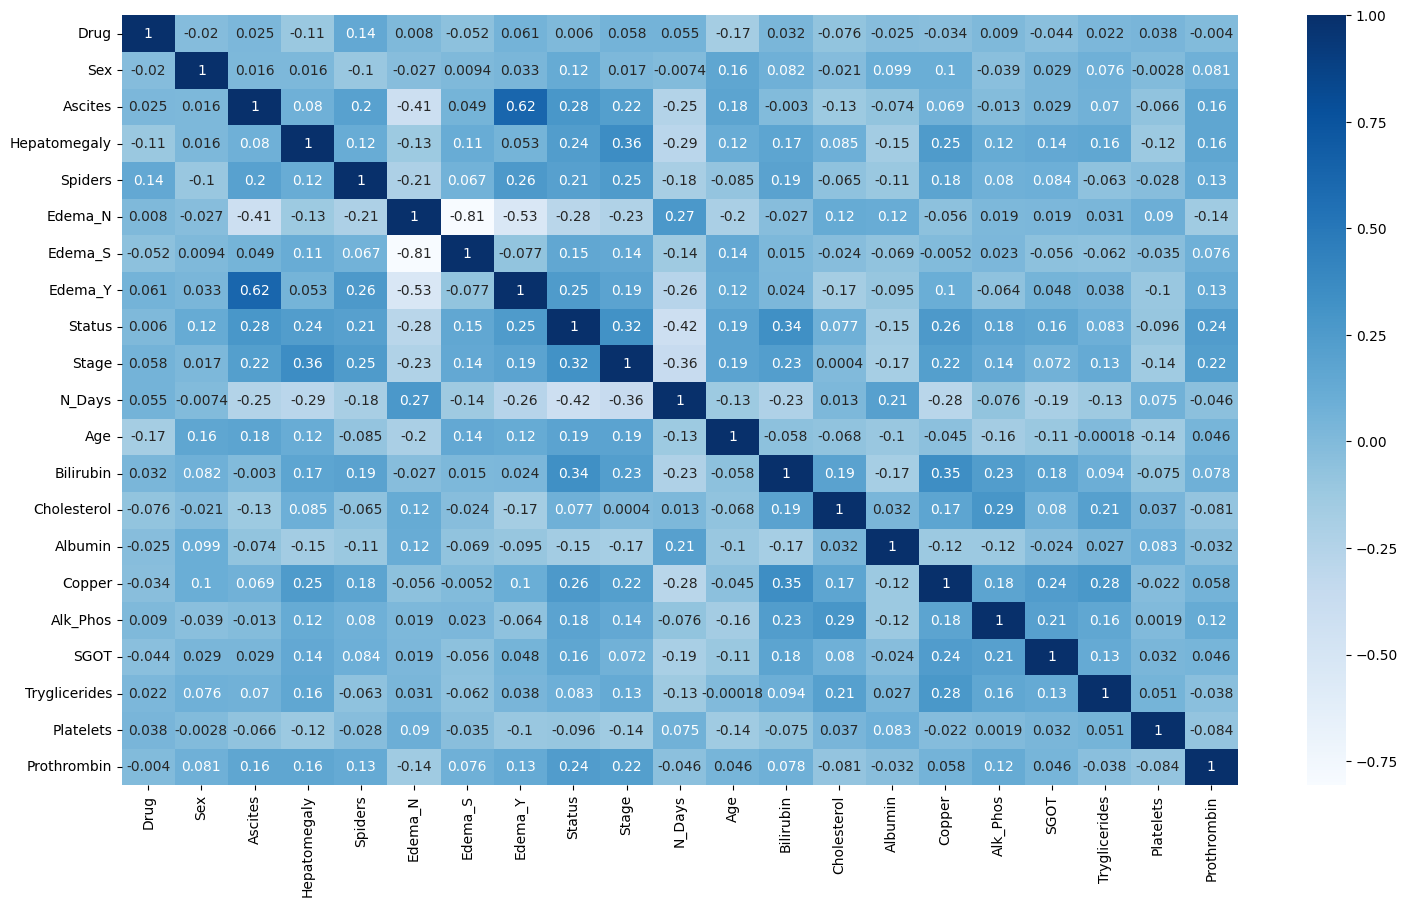

In [ ]:
#Plot correlation Matrix
plt.figure(figsize = (18, 10))
sns.heatmap(df_scaled.corr(), annot = True, cmap = 'Blues')
plt.show()

In [ ]:
#Dropping columns
df_scaled.drop(columns=['Drug','Cholesterol', 'Albumin', 'Tryglicerides','Platelets'],inplace = True)

# Model Validation and Selection

## Training and Testing Set Splitting

In [ ]:
#Split training and testing sets with a 80:20 ratio
X = df_scaled.drop(['Status',], axis = 1)
y = df_scaled['Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'df_scaled' is not defined

In [ ]:
#Verify shape of training and testing sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(334, 15)
(84, 15)
(334,)
(84,)


## Logistic Regression Model

In [ ]:
#Initialize Logistic Regression Model
reg_model = LogisticRegression()

#Fit Logistic Regression Model on training set
reg_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Evaluate the trained model on the testing set
reg_y_pred = reg_model.predict(X_test)


array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 1,
       0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 2, 0,
       0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0])

In [ ]:
#Calculate the accuracy score
reg_accuracy = accuracy_score(y_test, reg_y_pred)
print(f"Logistic Regression accuracy score: {reg_accuracy * 100:2f}%")

Logistic Regression accuracy score: 75.000000%


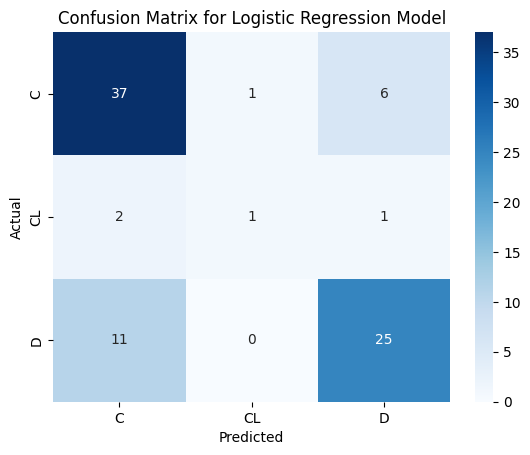

In [ ]:
#Plot Confusion Matrix for performance evaluation
reg_conf_matrix = confusion_matrix(y_test, reg_y_pred)

target_labels = label_encoder.classes_
sns.heatmap(reg_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_labels, yticklabels=target_labels)
plt.title('Confusion Matrix for Logistic Regression Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
label_encoder.classes_[2]

'D'

In [ ]:
#Generate Classification Report
reg_class_report = classification_report(y_test, reg_y_pred, target_names=target_labels)
print(reg_class_report)

              precision    recall  f1-score   support

           C       0.74      0.84      0.79        44
          CL       0.50      0.25      0.33         4
           D       0.78      0.69      0.74        36

    accuracy                           0.75        84
   macro avg       0.67      0.60      0.62        84
weighted avg       0.75      0.75      0.74        84



## K-Nearest Neighbors Model

In [ ]:
#Obtain the k value with highest accuracy
k_range = range(1, 21)
k_scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors = k)
  scores = cross_val_score(knn, X_train, y_train, cv = 20, scoring = 'accuracy')
  k_scores.append(scores.mean())

k_scores

[0.5755514705882353,
 0.6051470588235295,
 0.6288602941176471,
 0.6617647058823529,
 0.6590073529411764,
 0.6799632352941176,
 0.7066176470588236,
 0.6884191176470588,
 0.7011029411764707,
 0.6979779411764706,
 0.6954044117647058,
 0.6922794117647059,
 0.6865808823529411,
 0.6832720588235295,
 0.6803308823529411,
 0.6887867647058823,
 0.6985294117647058,
 0.6922794117647059,
 0.6954044117647059,
 0.7038602941176471]

In [ ]:
#Print the result
optimal_k = k_range[np.argmax(k_scores)]
print(f"The optimal number of neighbors is {optimal_k} with cross-validated accuracy of {max(k_scores):.2f}")

optimal_k

The optimal number of neighbors is 7 with cross-validated accuracy of 0.71


7

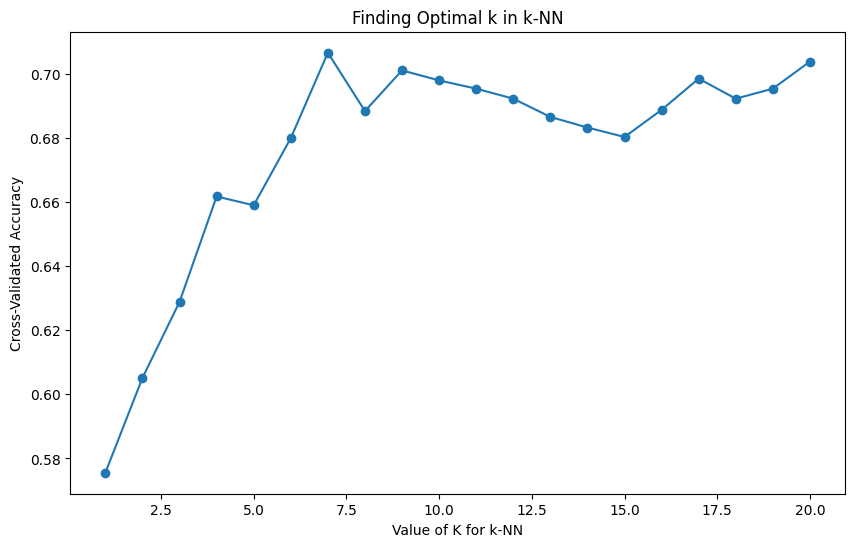

In [ ]:
#Plot line graph for cross-validated accuracy of k
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o')
plt.xlabel('Value of K for k-NN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Finding Optimal k in k-NN')
plt.show()

In [ ]:
#Initialize K-Nearest Neighbors Model
knn = KNeighborsClassifier(n_neighbors = optimal_k)

#Fit KNN Model on training set
knn.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
#Evaluate the trained model on the testing set
knn_y_pred = knn.predict(X_test)

In [ ]:
#Calculate the accuracy score
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print(f"K-Nearest Neighbors accuracy score: {knn_accuracy * 100:2f}%")

K-Nearest Neighbors accuracy score: 71.428571%


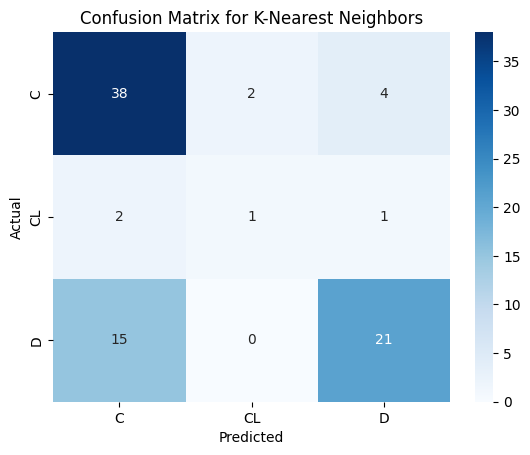

In [ ]:
#Plot Confusion Matrix for performance evaluation
knn_conf_matrix = confusion_matrix(y_test, knn_y_pred)

sns.heatmap(knn_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_labels, yticklabels=target_labels)
plt.title('Confusion Matrix for K-Nearest Neighbors')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
#Generate Classification Report
knn_class_report = classification_report(y_test, knn_y_pred, target_names=target_labels)
print(knn_class_report)

              precision    recall  f1-score   support

           C       0.69      0.86      0.77        44
          CL       0.33      0.25      0.29         4
           D       0.81      0.58      0.68        36

    accuracy                           0.71        84
   macro avg       0.61      0.57      0.58        84
weighted avg       0.72      0.71      0.71        84



## Decision Tree Classifier Model

In [ ]:
#Initialize Decision Tree Classifier Model
clf = DecisionTreeClassifier()

#Fit CLF Model on training set
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
#Evaluate the trained model on the testing set
clf_y_pred = clf.predict(X_test)

In [ ]:
#Calculate the accuracy score
clf_accuracy = accuracy_score(y_test, clf_y_pred)
print(f"Decision Tree Classifier accuracy score: {clf_accuracy * 100:2f}%")

Decision Tree Classifier accuracy score: 65.476190%


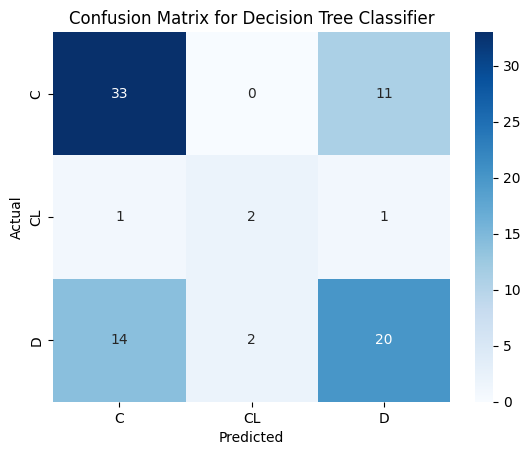

In [ ]:
#Plot Confusion Matrix for performance evaluation
clf_conf_matrix = confusion_matrix(y_test, clf_y_pred)

sns.heatmap(clf_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_labels, yticklabels=target_labels)
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
#Generate Classification Report
clf_class_report = classification_report(y_test, clf_y_pred, target_names=target_labels)
print(clf_class_report)

              precision    recall  f1-score   support

           C       0.69      0.75      0.72        44
          CL       0.50      0.50      0.50         4
           D       0.62      0.56      0.59        36

    accuracy                           0.65        84
   macro avg       0.60      0.60      0.60        84
weighted avg       0.65      0.65      0.65        84



## Random Forest Classifier Model

In [ ]:
#Initialize Random Forest Classifier Model
rf = RandomForestClassifier(max_depth = 30, n_estimators = 10000)

#Fit RF Model on training set
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=30, n_estimators=10000)

In [ ]:
#Evaluate the trained model on the testing set
rf_y_pred = rf.predict(X_test)

In [ ]:
#Calculate the accuracy score
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Random Forest Classifier accuracy score: {rf_accuracy * 100:2f}%")

Random Forest Classifier accuracy score: 76.190476%


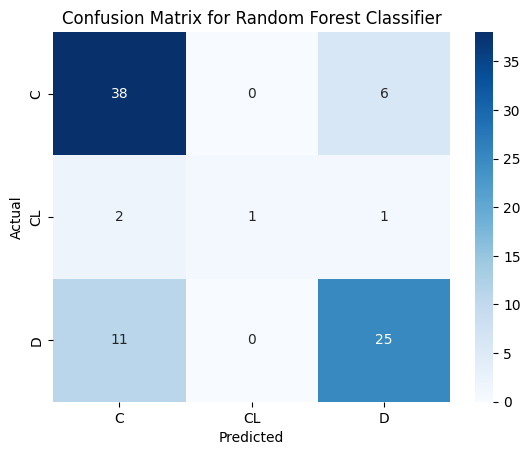

In [ ]:
#Plot Confusion Matrix for performance evaluation
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)

sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_labels, yticklabels=target_labels)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
#Generate Classification Report
rf_class_report = classification_report(y_test, rf_y_pred, target_names=target_labels)
print(rf_class_report)

              precision    recall  f1-score   support

           C       0.75      0.86      0.80        44
          CL       1.00      0.25      0.40         4
           D       0.78      0.69      0.74        36

    accuracy                           0.76        84
   macro avg       0.84      0.60      0.65        84
weighted avg       0.77      0.76      0.75        84

